<a href="https://colab.research.google.com/github/HoaNguyenCoder9x/Python_P1_Sale_Analysis/blob/main/P1_Sale_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT LIBRARY**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### **CLONE DATA FROM GITHUB**

In [2]:
!git clone https://github.com/boringPpl/Sales-Reporting.git


Cloning into 'Sales-Reporting'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 21 (delta 11), reused 18 (delta 11), pack-reused 0
Unpacking objects: 100% (21/21), done.


### **DATA SYNTHESIS**


In [3]:
# example /content/Sales-Reporting/data/sales2019_1.csv

path= '/content/Sales-Reporting/data'
folder = os.listdir(path)
url = []
listdata = []
len_data = []
#get url 
for file in folder:
  if file.endswith('.csv'):
    url.append(path+'/'+file)
#merge file
for i in range(len(url)):
  data = pd.read_csv(url[i])
  len_data.append(len(data))
  listdata.append(data)
  df= pd.concat(listdata, ignore_index=True)


In [4]:
#check length
len(df) ==  sum(len_data)

True

In [5]:
#save as new file
df.to_csv('combined_sale_2019.csv', index=False)

### **Question**
1. What is the best month for sales?
   How much was earned that month?
2. What city has best sales?
3. What time should we display ads to maxiumize the likelihood of customer's buying product?
4. What products are most often sold together?
5. What product sold the most?
   Why should you think it sold the most?
   


### **DATA PREPROCESSING**

**Remove NA and Duplicate**

In [23]:
file_data = input('Input file data to analysis:')
df =  pd.read_csv(file_data)

Input file data to analysis:/content/combined_sale_2019.csv


In [36]:
#remove NA rows
df = df[~df['Order ID'].isna()]

#remove duplicate rows
df = df[~(df['Order ID'] == 'Order ID')]

**Convert cols to right dtype**


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [39]:
#convert Quantity Ordered to integer
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast='integer')

#convert Price Each to float
df['Price Each'] = pd.to_numeric(df['Price Each'],downcast='float')

#convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'],yearfirst=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int8          
 3   Price Each        185950 non-null  float32       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float32(1), int8(1), object(3)
memory usage: 8.0+ MB


**Q1: What is the best month for sales? How much was earned that month?**

In [44]:
#create month cols
df['Month'] = df['Order Date'].dt.month
#create sales cols = Price Each * Quantity Ordered
df['Sales'] = df['Price Each'] * df['Quantity Ordered']

In [45]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.990000,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.980000
1,236671,Bose SoundSport Headphones,1,99.989998,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.989998
2,236672,iPhone,1,700.000000,2008-06-19 14:40:00,"149 7th St, Portland, OR 97035",6,700.000000
3,236673,AA Batteries (4-pack),2,3.840000,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.680000
4,236674,AA Batteries (4-pack),2,3.840000,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.680000


In [190]:
sale_by_month = df.groupby('Month').sum()['Sales'].to_frame()
best_sale_month = sale_by_month['Sales'].idxmax()
best_sale_value = sale_by_month['Sales'].max()
print(f'The month {best_sale_month} have the highest sales {best_sale_value} ')


The month 12 have the highest sales 3925406.75 


Text(0, 0.5, 'Mil USD')

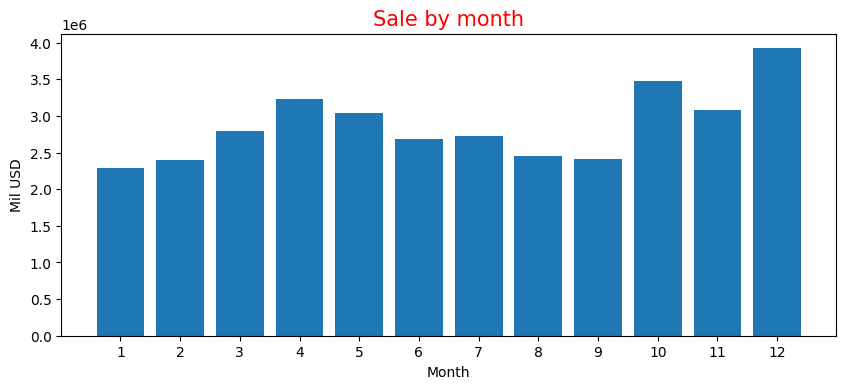

In [106]:
#visualize by plt
plt.figure(figsize=(10,4), dpi=100)
plt.bar(x=sale_by_month.index, height=sale_by_month['Sales'])
plt.xticks(sale_by_month.index)
plt.title('Sale by month', fontsize=15, color='red')
plt.xlabel('Month')
plt.ylabel('Mil USD')

**Q2: What city has best sales?**

In [107]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.990000,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.980000
1,236671,Bose SoundSport Headphones,1,99.989998,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.989998
2,236672,iPhone,1,700.000000,2008-06-19 14:40:00,"149 7th St, Portland, OR 97035",6,700.000000
3,236673,AA Batteries (4-pack),2,3.840000,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.680000
4,236674,AA Batteries (4-pack),2,3.840000,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.680000


In [110]:
#extract cols city from Purchase Address
df['City'] = df['Purchase Address'].str.split(',').str[1]

In [156]:
sale_by_city = df.groupby('City').sum()['Sales'].to_frame().reset_index()
CitySalesMax = sale_by_city[sale_by_city['Sales']==sale_by_city['Sales'].max()]

print(f"The City {CitySalesMax['City'].iloc[0]} have the highest sales {CitySalesMax['Sales'].iloc[0]} ")
sale_by_city

The City  San Francisco have the highest sales 8262204.0 


,City,Sales
0,Atlanta,2795498.50
1,Austin,1819581.75
2,Boston,3661642.00
3,Dallas,2767975.50
4,Los Angeles,5452571.00
5,New York City,4664317.50
6,Portland,2320490.50
7,San Francisco,8262204.00
8,Seattle,2747755.50


Text(0.5, 1.0, 'Sales by City')

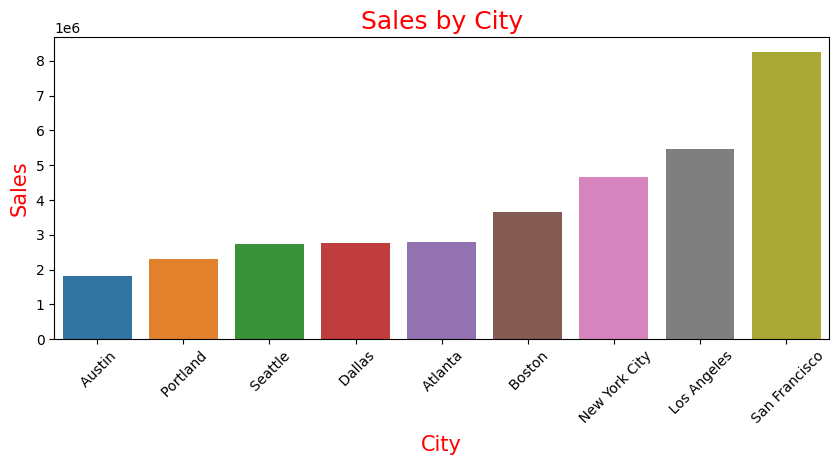

In [157]:
#use seaborn to visualize
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=sale_by_city['City'],
            y=sale_by_city['Sales'],
            data=sale_by_city,
            order=sale_by_city.sort_values('Sales').City
          )
plt.xlabel('City', fontsize=15, color='red')
plt.ylabel('Sales', fontsize=15, color='red')
plt.xticks(rotation=45)
plt.title('Sales by City',fontsize=18, color='red')

**Q3:What time should we display ads to maxiumize the likelihood of customer's buying product?**

In [175]:
df['Hour'] = df['Order Date'].dt.hour
total_order_sale_by_hours  = df.groupby('Hour').count()['Order ID'].to_frame().reset_index()
total_order_sale_by_hours = total_order_sale_by_hours.rename(columns={'Order ID':'Total Order'})

Text(0.5, 1.0, 'Total Order by Hour')

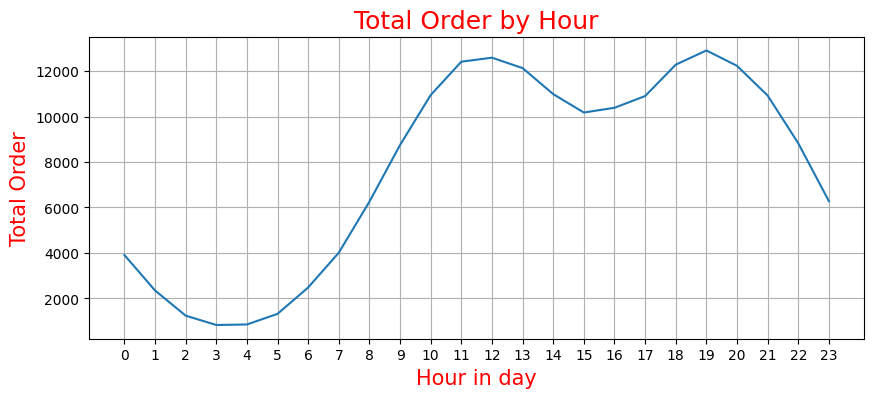

In [179]:
plt.figure(figsize=(10,4), dpi=100)
sns.lineplot(x=total_order_sale_by_hours['Hour'],
            y=total_order_sale_by_hours['Total Order'],
            data=total_order_sale_by_hours,
           )

plt.xlabel('Hour in day', fontsize=15, color='red')
plt.ylabel('Total Order', fontsize=15, color='red')
plt.xticks(total_order_sale_by_hours['Hour'])
plt.grid()
plt.title('Total Order by Hour',fontsize=18, color='red')

In [181]:
print('top 5 time for sale. We should ads on before this time 30 mins')
total_order_sale_by_hours.nlargest(5, columns='Total Order')

top 5 time for sale. We should ads on before this time 30 mins


,Hour,Total Order
19,19,12905
12,12,12587
11,11,12411
18,18,12280
20,20,12228


**Q4: What product are most often bought together?**

In [182]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,236670,Wired Headphones,2,11.990000,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.980000,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.989998,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.989998,Dallas,15
2,236672,iPhone,1,700.000000,2008-06-19 14:40:00,"149 7th St, Portland, OR 97035",6,700.000000,Portland,14
3,236673,AA Batteries (4-pack),2,3.840000,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.680000,Los Angeles,20
4,236674,AA Batteries (4-pack),2,3.840000,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.680000,New York City,19


In [220]:
#get duplicate rows
df_dup = df[df['Order ID'].duplicated(keep=False)]
print(len(df_dup))
df_dup.head()

14649


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco,20
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco,20
60,236729,iPhone,1,700.00,2008-09-19 09:28:00,"635 Lake St, San Francisco, CA 94016",9,700.00,San Francisco,9
61,236729,Apple Airpods Headphones,1,150.00,2008-09-19 09:28:00,"635 Lake St, San Francisco, CA 94016",9,150.00,San Francisco,9
62,236730,Google Phone,1,600.00,2008-02-19 10:17:00,"445 Lincoln St, New York City, NY 10001",2,600.00,New York City,10


In [233]:
#group multi row into one
def funcc(Product):
  return ", ".join(Product)

df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(funcc)
df_dup.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,All Product
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco,20,"AA Batteries (4-pack), USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco,20,"AA Batteries (4-pack), USB-C Charging Cable"
60,236729,iPhone,1,700.00,2008-09-19 09:28:00,"635 Lake St, San Francisco, CA 94016",9,700.00,San Francisco,9,"iPhone, Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,2008-09-19 09:28:00,"635 Lake St, San Francisco, CA 94016",9,150.00,San Francisco,9,"iPhone, Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,2008-02-19 10:17:00,"445 Lincoln St, New York City, NY 10001",2,600.00,New York City,10,"Google Phone, Wired Headphones"


In [235]:
df_result = df_dup[['Order ID','All Product']]
df_result.head()

,Order ID,All Product
46,236716,"AA Batteries (4-pack), USB-C Charging Cable"
47,236716,"AA Batteries (4-pack), USB-C Charging Cable"
60,236729,"iPhone, Apple Airpods Headphones"
61,236729,"iPhone, Apple Airpods Headphones"
62,236730,"Google Phone, Wired Headphones"


**top 10 product sold together**

In [244]:
df_result['All Product'].value_counts().head(10)

iPhone, Lightning Charging Cable                        1764
Google Phone, USB-C Charging Cable                      1712
iPhone, Wired Headphones                                 722
Vareebadd Phone, USB-C Charging Cable                    624
Google Phone, Wired Headphones                           606
iPhone, Apple Airpods Headphones                         572
Google Phone, Bose SoundSport Headphones                 322
Google Phone, USB-C Charging Cable, Wired Headphones     231
Vareebadd Phone, Wired Headphones                        208
iPhone, Lightning Charging Cable, Wired Headphones       168
Name: All Product, dtype: int64

**Q5: What product sold the most ? Why do you think it sold the most ?**

In [273]:
sale_by_product = df.groupby('Product').sum()['Quantity Ordered']

In [277]:
price = df.groupby('Product').mean()['Price Each']


Text(0.5, 1.0, 'Sales Product by Qty')

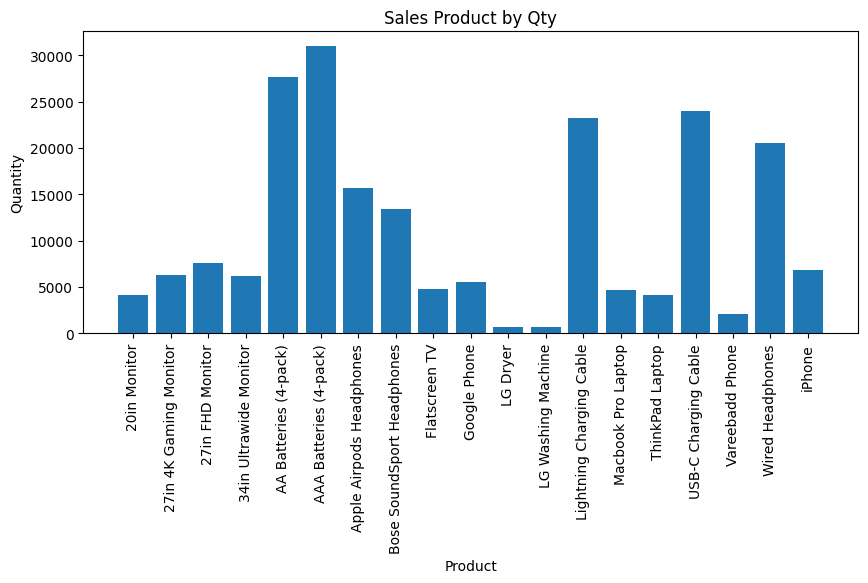

In [275]:
fig = plt.figure(figsize=(10,4), dpi=100)
plt.bar(x=sale_by_product.index, height=sale_by_product )
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Sales Product by Qty')

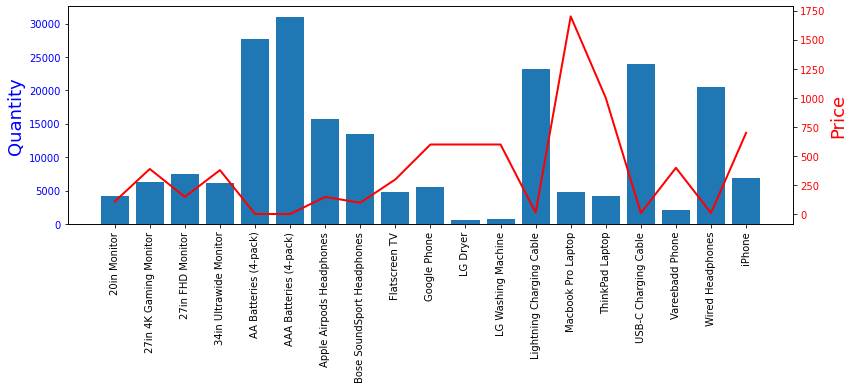

In [286]:
fig, ax1 = plt.subplots(figsize=(13,4))

x1=sale_by_product.index
y1=sale_by_product.values
y2=price.values

ax1.bar(x=x1, height=y1 )
ax1.set_ylabel(r"Quantity", fontsize=18, color="blue")
plt.xticks(rotation=90)
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x1, y2, lw=2, color="red")
ax2.set_ylabel(r"Price", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

Hyposis why that product sold the most
1. Price
2. Branch
3. Quality

We both know that Price, Branch and Quality are some main reason effect directly to product sold. Based on data, we just have Price to set the hypothesis, so we can make a conclusion that the reason why AA Bateries are sold the most is cheap price.
 